#### Introduction
This assignment will be a little different. You are going to use some of the built-in toolkits to try doing K-Means clustering in multiple dimensions. You are also going to try using _dimensionality reduction_ and _dimension transformation_ to improve your performance.

#### Data
You will need `hw5_data_1.npy`, `hw5_data_2.npy`, and `hw5_data_3.npy`. You can load these into Python using

`
data = np.load(filename)
`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture as GMM

In [2]:
def scatter(x,**kwargs):
    plt.scatter(x[:,0],x[:,1],**kwargs)

#### Data 1
The data in this file is `2000x2` which means it is 2000 samples of 2-dimensional data. The first 1000 data points are from Cluster 0 and the second are from Cluster 1. Use the built-in `KMeans` toolbox to apply K-Means clustering to this data. Use the `confusion_matrix` function to determine how good your fit is. Your only goal here is to practice using the built-in toolboxes.

[[997   3]
 [176 824]]


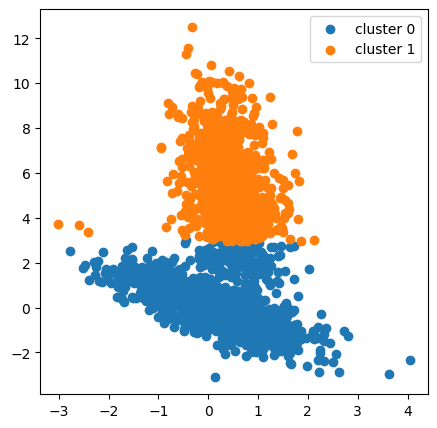

In [3]:
data = np.load('hw5_data_1.npy')
cluster_id_true = np.zeros(2000,)
cluster_id_true[   0:1000] = 0
cluster_id_true[1000:2000] = 1

cluster_id_sim = KMeans(n_clusters=2).fit_predict(data)

plt.figure(figsize=(5,5))
scatter(data[cluster_id_sim==0,:] , label='cluster 0')
scatter(data[cluster_id_sim==1,:] , label='cluster 1')
plt.legend()

cm = confusion_matrix(cluster_id_true , cluster_id_sim)
print(cm)

# clustering performs reasonably well but clearly there is room for improvement

#### Data 2
The data in this file is `4000x5` which means it is 4000 samples of 5-dimensional data. Data of anything more than 2-dimensions is difficult (impossible?) to visualize. Try plotting 2D or 3D scatter plots of two or three dimensions of the data at a time to try to get an idea of what it looks like. How many clusters do you think there are?

Use `KMeans` to cluster the data according to however many clusters you think there should be. Create some sort of plots that demonstrate the results of the clustering.

One popular approach with multidimensional data is to _reduce_ the dimensionality before clustering it. This means projecting the data onto a lower dimension. For example, if you have x, y, and z, but y and z are highly correlated, then you can easily just work with x and y for clustering purposes. Use the `PCA` library to reduce your data to two dimensions. Create a 2D scatterplot to verify it worked. Then use `KMeans` to cluster the reduced data. Does it work? Comment on what you see.

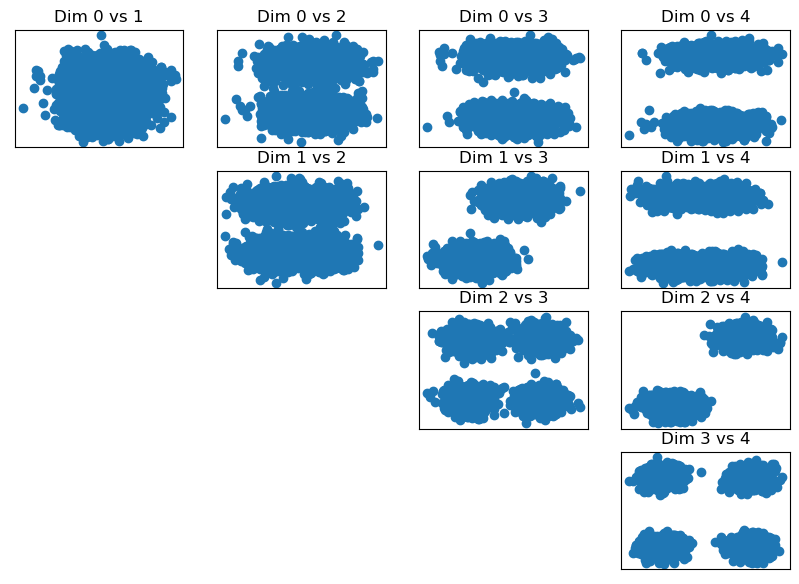

In [3]:
data = np.load('hw5_data_2.npy')
f,a = plt.subplots(4,4,figsize=(10,7))

for i in range(5):
    for j in range(i+1,5):
        plt.sca(a[i,j-1])
        scatter(data[:,[i,j]])
        plt.title('Dim ' + str(i) + ' vs ' + str(j) )
        plt.xticks([]), plt.yticks([])


for i in range(1,4): 
    for j in range(i):
        f.delaxes(a[i,j])

        
plt.show()

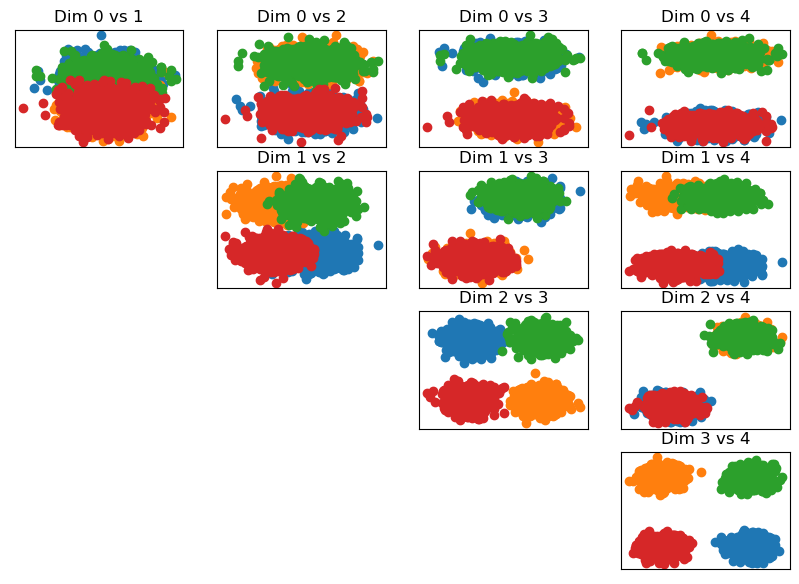

In [6]:
# apply k means to data
cluster_id = KMeans(n_clusters=4).fit_predict(data)

f,a = plt.subplots(4,4,figsize=(10,7))

for i in range(5):
    for j in range(i+1,5):
        plt.sca(a[i,j-1])

        plt.scatter(data[cluster_id==0,i],data[cluster_id==0,j])
        plt.scatter(data[cluster_id==1,i],data[cluster_id==1,j])
        plt.scatter(data[cluster_id==2,i],data[cluster_id==2,j])
        plt.scatter(data[cluster_id==3,i],data[cluster_id==3,j])
        
        plt.title('Dim ' + str(i) + ' vs ' + str(j) )
        plt.xticks([]), plt.yticks([])


for i in range(1,4): 
    for j in range(i):
        f.delaxes(a[i,j])

        
plt.show()

[0.6384691  0.32387229 0.01285708 0.01269562 0.01210591]


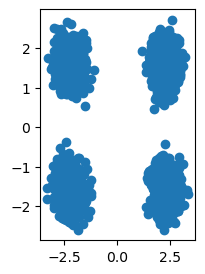

In [11]:
# reducing dimensionality to 2D makes it easy to see there are four well-separated clusters
pca = PCA(n_components=5)
pca.fit(data)
print(pca.explained_variance_ratio_)

data_reduced = PCA(n_components=2).fit_transform(data)
plt.figure(figsize=(2,3))
scatter(data_reduced)

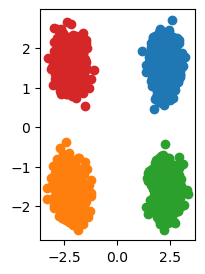

In [8]:
# now we can do apply clustering to the transformed data
cluster_id = KMeans(n_clusters=4).fit_predict(data_reduced)

# lets start by looking at the clusters of the reduced (transformed) data
plt.figure(figsize=(2,3))
scatter(data_reduced[cluster_id==0,:])
scatter(data_reduced[cluster_id==1,:])
scatter(data_reduced[cluster_id==2,:])
scatter(data_reduced[cluster_id==3,:])


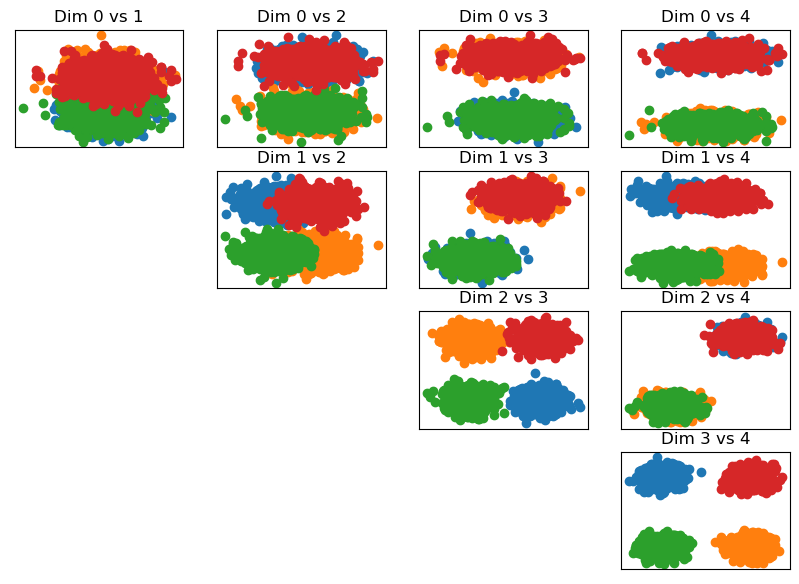

In [7]:
# Now we can use those same cluster IDs with the original (unreduced) data
f,a = plt.subplots(4,4,figsize=(10,7))

for i in range(5):
    for j in range(i+1,5):
        plt.sca(a[i,j-1])
        plt.scatter(data[cluster_id==0,i] , data[cluster_id==0,j])
        plt.scatter(data[cluster_id==1,i] , data[cluster_id==1,j])
        plt.scatter(data[cluster_id==2,i] , data[cluster_id==2,j])
        plt.scatter(data[cluster_id==3,i] , data[cluster_id==3,j])
        
        plt.title('Dim ' + str(i) + ' vs ' + str(j) )
        plt.xticks([]), plt.yticks([])


for i in range(1,4): 
    for j in range(i):
        f.delaxes(a[i,j])


#### Data 3
The data in this last file is `1000x2`. If you do a scatterplot, you will see two well-defined clusters. Try to cluster the data using `KMeans`. How well does it work? Why?

Try using `PCA` before `KMeans` to see if that helps separate the data. In this case, `PCA` won't be used for dimension reduction (because the data is 2D to start with so its already a low dimension). But perhaps doing a 2D projection might help separate out the clusters. Does that help? Why?

Finally, try using `KernelPCA` to apply a _kernel_ to the data along with `PCA` before `KMeans` clustering. There are several kernel types available. Which one works best?  You can read more about kernels and basis functions __[here](https://www.cs.princeton.edu/courses/archive/fall18/cos324/files/basis-functions.pdf)__

How does the clustering perform now? Is there still room for improvement?


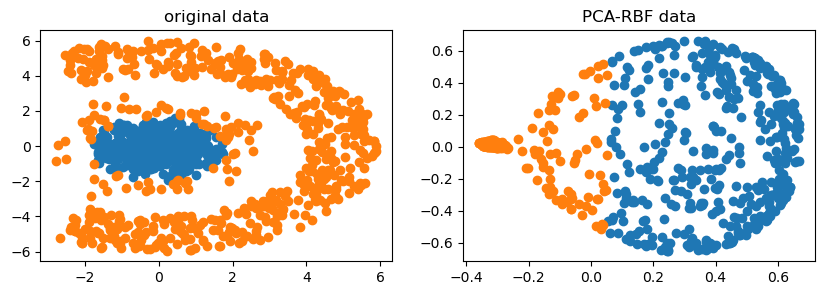

In [21]:
data = np.load('hw5_data_3.npy')

# reduce the data using a radial basis-powered pca function
data_reduced = KernelPCA(n_components=2,kernel='rbf').fit_transform(data)

# apply kmeans clustering to apply a linear boundary
# to the transformed data space
cluster_id = KMeans(n_clusters=2).fit_predict(data_reduced)
f,a = plt.subplots(1,2,figsize=(10,3))

plt.sca(a[0])
scatter(data[cluster_id==0,:] , color='tab:blue'  )
scatter(data[cluster_id==1,:] , color='tab:orange')
plt.title('original data')

plt.sca(a[1])
scatter(data_reduced[cluster_id==0,:] , color='tab:blue'  )
scatter(data_reduced[cluster_id==1,:] , color='tab:orange')
plt.title('PCA-RBF data')
plt.show()

After today's class, it occurred to me to try clustering the PCA-RBF data using a GMM instead of KMeans. I think you'll appreciate the results:

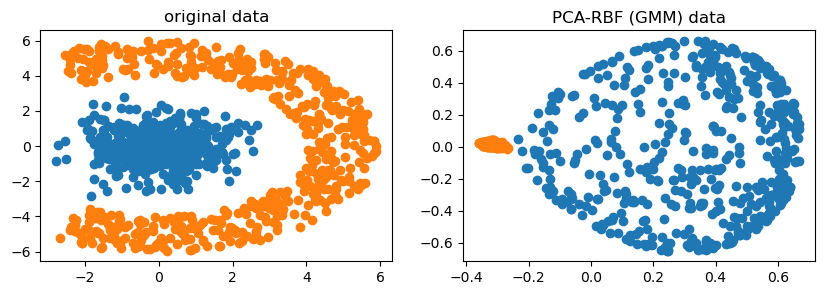

In [23]:
# reduce the data using a radial basis-powered pca function
data_reduced = KernelPCA(n_components=2,kernel='rbf').fit_transform(data)

# apply gmm clustering to apply a boundary
# to the transformed data space
cluster_id = GMM(n_components=2).fit_predict(data_reduced)
f,a = plt.subplots(1,2,figsize=(10,3))

plt.sca(a[0])
scatter(data[cluster_id==0,:] , color='tab:blue'  )
scatter(data[cluster_id==1,:] , color='tab:orange')
plt.title('original data')

plt.sca(a[1])
scatter(data_reduced[cluster_id==0,:] , color='tab:blue'  )
scatter(data_reduced[cluster_id==1,:] , color='tab:orange')
plt.title('PCA-RBF (GMM) data')
plt.show()